In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_dataload = "mouse_drug_data.csv"
clinical_trial_dataload = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_dataload)
trial_data = pd.read_csv(clinical_trial_dataload)

# Combine the data into a single dataset
drug_merged_df = trial_data.merge(mouse_data, on = 'Mouse ID', how = 'outer')
    
# Display the data table for preview
drug_merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = drug_merged_df[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
# Calculate mean of Tumor Volume per drug
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())


# Convert to DataFrame

# Preview DataFrame


In [5]:
tumor_response_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [8]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_pivot.head()

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


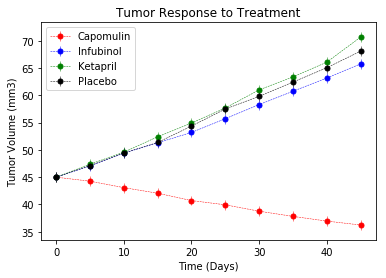

In [9]:
# Generate the Plot (with Error Bars)
#tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
#tumor_response_pivot.head()
# Reshaping the Volume SEM data frame using Pivot Table
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem_pivot

# Save the Figure
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Time (Days)")
# y label
plt.ylabel("Tumor Volume (mm3)")
# legend 
plt.legend(loc='upper left')
plt.show()



## Metastatic Response to Treatment

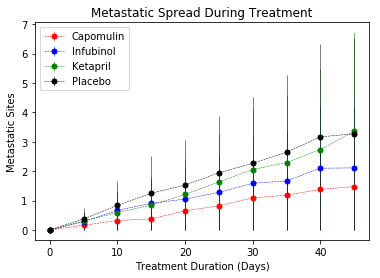

In [10]:
# Select required columns for analysis
metastatic_response_df = drug_merged_df[['Drug', 'Timepoint', 'Metastatic Sites']]

# Calculate mean of Metastatic Sites per drug
metastatic_response_df = pd.DataFrame(metastatic_response_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean())
metastatic_response_sem_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_sem_pivot
# Calculate standard error for Metastatic Sites
metastatic_response_df["Metastatic Site SEM"] = metastatic_response_df['Metastatic Sites'].sem()
metastatic_response_df.reset_index(inplace = True)
metastatic_response_df.head()

# Reshaping the data frame using Pivot Table
metastatic_response_pivot = metastatic_response_df.pivot_table(index='Timepoint',columns='Drug',values='Metastatic Sites')  
metastatic_response_pivot.head()

# Create scatter plot to show how number of metastatics sites changes overtime for each treatment
plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Capomulin'], yerr=metastatic_response_sem_pivot['Capomulin'],
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Infubinol'], yerr=metastatic_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Ketapril'], yerr=metastatic_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(metastatic_response_pivot.index, metastatic_response_pivot['Placebo'], yerr=metastatic_response_sem_pivot['Placebo'],
             color='black', marker='o', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Metastatic Spread During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Metastatic Sites")
# legend 
plt.legend(loc='upper left')
plt.show()



## Survival Rates

In [11]:
# Preview DataFrame

# Set index to Drug and Timepoint
survival_rate_df = drug_merged_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']
survival_rate_df = survival_rate_df.unstack(level = 0)
#survival_rate_df = drug_merged_df[['Drug', 'Timepoint', 'Mouse ID']]
#survival_rate_df = drug_merged_df[count('Mouse ID')]
survival_rate_df.head() 




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


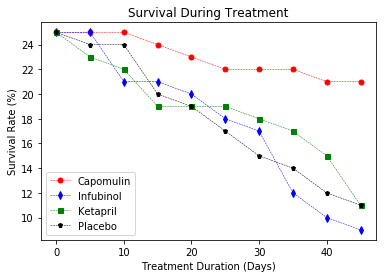

In [12]:
survival_rate_df = drug_merged_df.set_index(['Drug', 'Timepoint'])
survival_rate_df.head()

survival_rate_df['Mouse Count'] = survival_rate_df.groupby(['Drug','Timepoint']).count()['Mouse ID']

survival_rate_pivot = survival_rate_df.pivot_table(index='Timepoint',columns='Drug',values='Mouse Count')  
survival_rate_pivot

# Create scatter plot to show the survival rate of mice through the course of treatment
plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Capomulin'], 
             color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Infubinol'], 
             color='b', marker='d', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Ketapril'], 
             color='g', marker='s', markersize=5, linestyle='--', linewidth=0.5)

plt.errorbar(survival_rate_pivot.index, survival_rate_pivot['Placebo'], 
             color='black', marker='p', markersize=5, linestyle='--', linewidth=0.5)

# Chart title
plt.title("Survival During Treatment")
# x label
plt.xlabel("Treatment Duration (Days)")
# y label
plt.ylabel("Survival Rate (%)")
# legend 
plt.legend(loc='lower left')
plt.show()


## Summary Bar Graph

In [17]:
#tumor_volume_change_percentage.index


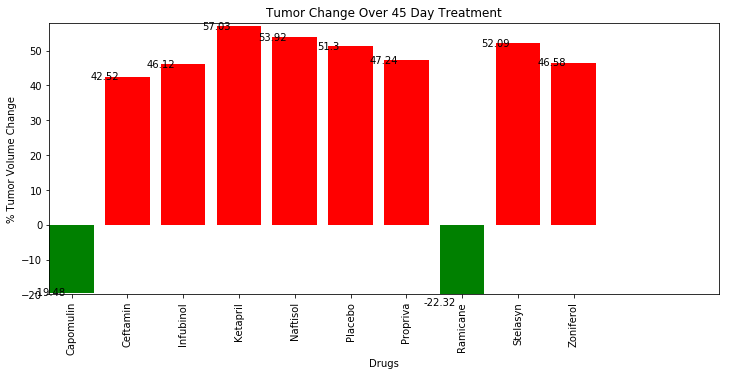

In [13]:
tumor_volume_change_percentage =  ((tumor_response_pivot.iloc[-1]-tumor_response_pivot.iloc[0])/tumor_response_pivot.iloc[0]) * 100
tumor_volume_change_percentage

tumor_volume_change_percentage.index 
tumor_volume_change_percentage.values
x_axis = np.arange(len(tumor_volume_change_percentage.values))
x_axis
plt.figure(figsize=(12,5))
# Create a bar chart based upon the above dat
plt.bar(x_axis, tumor_volume_change_percentage.values, color=['g','r','r','r','r','r','r','g','r','r'], align="edge")
#plt.bar(x_axis, tumor_volume_change_percentage.values, color="g", align="edge")
# Create the ticks for our bar chart's x axis
tick_locations = [value+0.4 for value in x_axis]

plt.xticks(tick_locations, tumor_volume_change_percentage.index,rotation="vertical")

# Set the limits of the x axis
plt.xlim(0, len(x_axis) + 2)
# Set the limits of the y axis
plt.ylim(-20, max(tumor_volume_change_percentage.values)+1)
# Give the chart a title, x label, and y label
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
#<matplotlib.text.Text at 0x11420eea320>
# Save an image of the chart and print it to the screen
for a,b in zip(x_axis, tumor_volume_change_percentage.values):
    plt.text(a, b, str(round(b,2)),ha='center',va='center')
    #plt.annotate(str(round(b,2)),(a,str(round(b,2))))
             
plt.savefig("% Tumor Volume Change")
plt.show()





In [1]:
print("Capomulin & Ramicane drugs are effective according to the Bar Chart reflected in Green ")

Capomulin & Ramicane drugs are effective according to the Bar Chart reflected in Green 
